In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [151]:
df = pd.read_csv('ConstructionTimeSeriesDatav2.csv')
#df.head()

dfPrivate = df[['Month','Month-Year','Private Construction']].copy()
#dfPrivate.head()

dfPublic = df[['Month','Month-Year','Public Construction']].copy()
#dfPublic.head()

# Private Construction Contracts

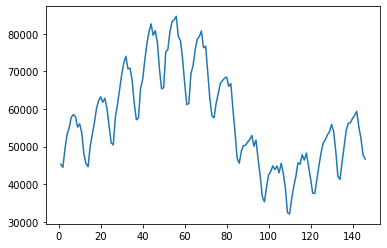

In [152]:
plt.plot(dfPrivate['Month'], dfPrivate['Private Construction'])

We can see that there is a pattern throughout each cycle, with the values increasing and then decreasing towards the end of the cycle.

In [153]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(df.index,dfPrivate['Private Construction'])
print('intercept =', intercept, '    slope =', slope, '     p_value = ',p_value)

intercept = 66985.60357841766     slope = -132.5985944684912      p_value =  3.965217656244861e-08


The p_value that we obtained is a very low p_value, meaning that there is a correlation or trend in the values of private construction contracts.

In [154]:
def create_regress_col(row, intercept, slope):
    return float(intercept) + float(row['Month']) * slope

dfPrivate['regress'] = dfPrivate.apply(create_regress_col,args = (intercept,slope),axis = "columns")
dfPrivate['R1Private'] = dfPrivate['Private Construction'] - dfPrivate['regress']
dfPrivate.style.format({
    'Private Construction': '{:,.0f}'.format,
    'regress': '{:,.0f}'.format,
    'R1Private': '{:,.0f}'.format
    })

,Month,Month-Year,Private Construction,regress,R1Private
0,1,Jan-02,"45,273","66,853","-21,580"
1,2,Feb-02,"44,475","66,720","-22,245"
2,3,Mar-02,"49,396","66,588","-17,192"
3,4,Apr-02,"53,283","66,455","-13,172"
4,5,May-02,"55,009","66,323","-11,314"
5,6,Jun-02,"57,801","66,190","-8,389"
6,7,Jul-02,"58,494","66,057","-7,563"
7,8,Aug-02,"57,953","65,925","-7,972"
8,9,Sep-02,"55,157","65,792","-10,635"
9,10,Oct-02,"56,023","65,660","-9,637"


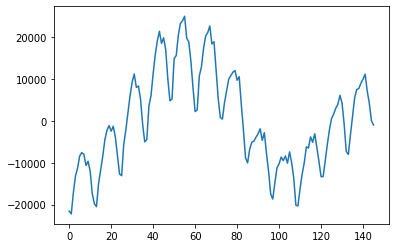

In [155]:
plt.plot(dfPrivate.index,dfPrivate.R1Private)

autocorrelation, lag = 0 : 1.0
autocorrelation, lag = 1 : 0.9522259428525873
autocorrelation, lag = 2 : 0.8536630636721789
autocorrelation, lag = 3 : 0.7332009748597663
autocorrelation, lag = 4 : 0.6265403284043024
autocorrelation, lag = 5 : 0.5477094607353201
autocorrelation, lag = 6 : 0.5022075499571733
autocorrelation, lag = 7 : 0.5095022252598469
autocorrelation, lag = 8 : 0.5495823494233384
autocorrelation, lag = 9 : 0.6186230124688379
autocorrelation, lag = 10 : 0.7052532017967261
autocorrelation, lag = 11 : 0.7726626193350626
autocorrelation, lag = 12 : 0.7903093615390632
autocorrelation, lag = 13 : 0.7158571273234671
autocorrelation, lag = 14 : 0.5891806722573821
autocorrelation, lag = 15 : 0.43791095695310617
autocorrelation, lag = 16 : 0.3002743096193064
autocorrelation, lag = 17 : 0.19038130275163695
autocorrelation, lag = 18 : 0.11651177005570622
autocorrelation, lag = 19 : 0.09948176780103736
autocorrelation, lag = 20 : 0.11742414667642231
autocorrelation, lag = 21 : 0.165

E:\Program Files (x86)\Python\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Text(0.5, 0, 'Months')

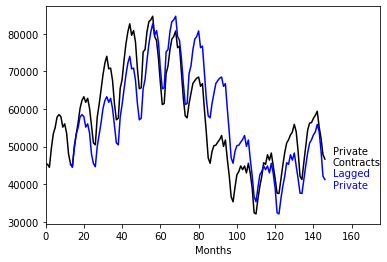

In [156]:
lag = 12
dfPrivate['lag12'] = np.NaN
for i in range(len(dfPrivate['lag12']))[lag:]:
    dfPrivate['lag12'].iloc[i] = dfPrivate['Private Construction'].iloc[i-12]
#print(dfPrivate.head(n=60))

# Compute autocorrelations
for i in range(int(len(dfPrivate.index)/2)):
    print('autocorrelation, lag =',i,':',dfPrivate.R1Private.autocorr(lag = i))
    
fig,ax = plt.subplots()
ax.plot(dfPrivate.Month,dfPrivate['Private Construction'],c='k')
ax.plot(dfPrivate.Month,dfPrivate.lag12,c='b')
ax.text(150,45000,'Private\nContracts',color='k')
ax.text(150,39000,'Lagged\nPrivate',color='b')
ax.set_xlim([0,175])

ax.set_xlabel('Months')

The autocorrelation of our data is 12 which is the period or cycle of our data.
The autocorrelation value was not the highest meaning that the data does not perfectly match up.

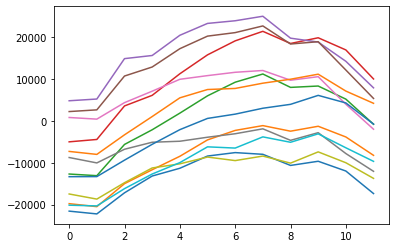

In [157]:
dfYear = pd.DataFrame()
cycleLen = 12
for i in range(int(len(dfPrivate.index)/cycleLen)):
    newData = pd.DataFrame({i:dfPrivate['R1Private'].iloc[i*cycleLen:(i+1)*cycleLen]})
    newData.index = range(0,len(newData))
    dfYear = pd.concat([dfYear,newData],axis=1)

fig,ax = plt.subplots()
ax.plot(dfYear)

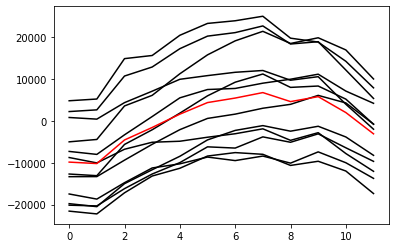

In [158]:
avg = []
for i in range(len(dfYear.index)):
    avg.append(dfYear.iloc[i].mean())

dfYear = pd.concat([dfYear,pd.DataFrame({'avg':avg})], axis=1)
#print(dfYear)

fig,ax = plt.subplots()
c = 180
for col in dfYear.columns.values:
    if col == 'avg':
        ax.plot(dfYear[col], c = 'r')
    else:
        ax.plot(dfYear[col], c = 'k')

There is a decrease in value of contracts at the first montn. Then the values rise throughout the year peaking in month 7. After month 7 the value of the contracts decrease.

In [159]:
dfPrivate['S'] = np.NaN
dfPrivate['R2Private'] = np.NaN
dfPrivate['Composite'] = np.NaN
dfPrivate['R2ErrorPrivate'] = np.NaN
S = dfYear['avg'].tolist()
for i in df.index:
    dfPrivate.loc[i,'S'] = S[i%cycleLen]
    dfPrivate.loc[i,'R2Private'] = dfPrivate.loc[i,'R1Private'] - dfPrivate.loc[i,'S']
    dfPrivate.loc[i,'Composite'] = dfPrivate.loc[i,'regress'] + dfPrivate.loc[i,'S']
    dfPrivate.loc[i,'R2ErrorPrivate'] = 100*dfPrivate.loc[i,'R2Private'] / dfPrivate.loc[i,'Private Construction']
dfPrivate.style.format({
    'Private Construction': '{:,.0f}'.format,
    'regress': '{:,.0f}'.format,
    'R1Private': '{:,.0f}'.format,
    'S': '{:,.0f}'.format,
    'R2Private': '{:,.0f}'.format,
    'Composite':'{:,.0f}'.format,
    'R2ErrorPrivate': '{:.2f}%'.format
})

,Month,Month-Year,Private Construction,regress,R1Private,lag12,S,R2Private,Composite,R2ErrorPrivate
0,1,Jan-02,"45,273","66,853","-21,580",nan,"-9,839","-11,741","57,014",-25.93%
1,2,Feb-02,"44,475","66,720","-22,245",nan,"-10,186","-12,059","56,534",-27.11%
2,3,Mar-02,"49,396","66,588","-17,192",nan,"-4,540","-12,652","62,048",-25.61%
3,4,Apr-02,"53,283","66,455","-13,172",nan,"-1,546","-11,626","64,909",-21.82%
4,5,May-02,"55,009","66,323","-11,314",nan,"1,642","-12,956","67,965",-23.55%
5,6,Jun-02,"57,801","66,190","-8,389",nan,"4,417","-12,806","70,607",-22.15%
6,7,Jul-02,"58,494","66,057","-7,563",nan,"5,497","-13,061","71,555",-22.33%
7,8,Aug-02,"57,953","65,925","-7,972",nan,"6,807","-14,779","72,732",-25.50%
8,9,Sep-02,"55,157","65,792","-10,635",nan,"4,650","-15,285","70,442",-27.71%
9,10,Oct-02,"56,023","65,660","-9,637",nan,"5,836","-15,473","71,496",-27.62%


The largest error in our model is -34.28%.

Text(0, 0.5, 'Private Contracts')

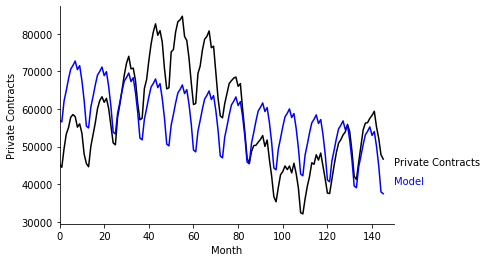

In [160]:
fig, ax = plt.subplots()
ax.plot(dfPrivate['Private Construction'],c='k')
ax.plot(dfPrivate['Composite'],c='b')
ax.set_xlim([0,150])
ax.text(150,45000,'Private Contracts', color='k')
ax.text(150,40000,'Model', color='b')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Month')
ax.set_ylabel('Private Contracts')

This is the remainder of our data. This shows the error in our model compared to the actual data. 

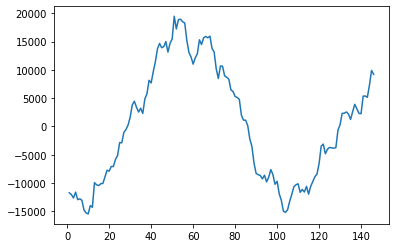

In [161]:
plt.plot(dfPrivate.Month,dfPrivate.R2Private)

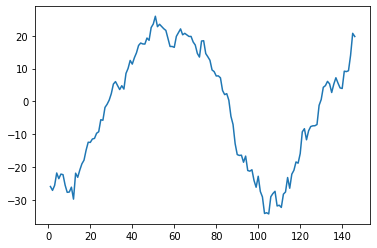

In [162]:
plt.plot(dfPrivate.Month,dfPrivate.R2ErrorPrivate)

# Public Construction Contracts

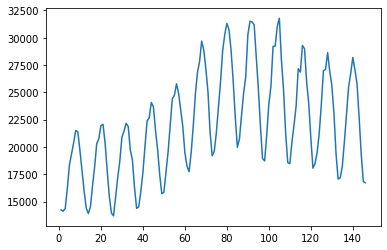

In [163]:
plt.plot(dfPublic['Month'], dfPublic['Public Construction'])

We can see that there is a pattern throughout each cycle, with the values increasing and then decreasing towards the end of the cycle.

In [164]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df.index,dfPublic['Public Construction'])
print('intercept =', intercept, '    slope =', slope, '     p_value = ',p_value)

intercept = 18327.939893765724     slope = 52.00857586303297      p_value =  3.028349007007645e-09


The p_value that we obtained is a very low p_value, meaning that there is a correlation or trend in the values of public construction contracts.

In [165]:
def create_regress_col(row, intercept, slope):
    return float(intercept) + float(row['Month']) * slope


dfPublic['regress'] = dfPublic.apply(create_regress_col,args = (intercept,slope),axis = "columns")
dfPublic['R1Public'] = dfPublic['Public Construction'] - dfPublic['regress']
dfPublic.style.format({
    'Public Construction': '{:,.0f}'.format,
    'regress': '{:,.0f}'.format,
    'R1Private': '{:,.0f}'.format,
    })


,Month,Month-Year,Public Construction,regress,R1Public
0,1,Jan-02,"14,243","18,380",-4136.948470
1,2,Feb-02,"14,113","18,432",-4318.957045
2,3,Mar-02,"14,386","18,484",-4097.965621
3,4,Apr-02,"16,221","18,536",-2314.974197
4,5,May-02,"18,375","18,588",-212.982773
5,6,Jun-02,"19,381","18,640",741.008651
6,7,Jul-02,"20,369","18,692",1677.000075
7,8,Aug-02,"21,507","18,744",2762.991499
8,9,Sep-02,"21,385","18,796",2588.982923
9,10,Oct-02,"19,687","18,848",838.974348


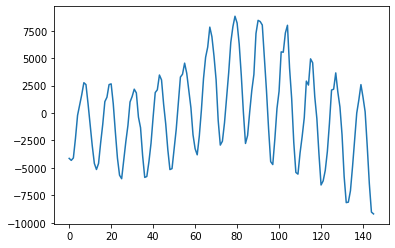

In [166]:
plt.plot(dfPublic.index,dfPublic.R1Public)

autocorrelation, lag = 0 : 0.9999999999999998
autocorrelation, lag = 1 : 0.8856280681661074
autocorrelation, lag = 2 : 0.6013224790427005
autocorrelation, lag = 3 : 0.2158670848758824
autocorrelation, lag = 4 : -0.16610636997182948
autocorrelation, lag = 5 : -0.42768100297253503
autocorrelation, lag = 6 : -0.5179874711984134
autocorrelation, lag = 7 : -0.41832063408165815
autocorrelation, lag = 8 : -0.15136655336477844
autocorrelation, lag = 9 : 0.21954961123223027
autocorrelation, lag = 10 : 0.5790216579473368
autocorrelation, lag = 11 : 0.8451120068400936
autocorrelation, lag = 12 : 0.9457610635882291
autocorrelation, lag = 13 : 0.8276421035386305
autocorrelation, lag = 14 : 0.5396014613105625
autocorrelation, lag = 15 : 0.14119515861605375
autocorrelation, lag = 16 : -0.24754432310853822
autocorrelation, lag = 17 : -0.5174466437147163
autocorrelation, lag = 18 : -0.615365355385478
autocorrelation, lag = 19 : -0.5192010829679752
autocorrelation, lag = 20 : -0.2550096270492796
autocor

E:\Program Files (x86)\Python\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Text(0.5, 0, 'Months')

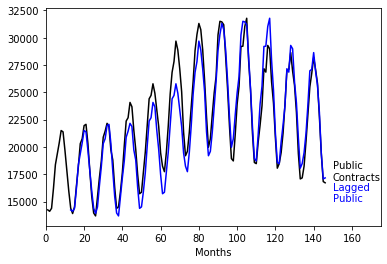

In [167]:
lag = 12
dfPublic['lag12'] = np.NaN
for i in range(len(dfPublic['lag12']))[lag:]:
    dfPublic['lag12'].iloc[i] = dfPublic['Public Construction'].iloc[i-12]
#print(dfPrivate.head(n=60))

# Compute autocorrelations
for i in range(int(len(dfPublic.index)/2)):
    print('autocorrelation, lag =',i,':',dfPublic.R1Public.autocorr(lag = i))
    
fig,ax = plt.subplots()
ax.plot(dfPublic.Month,dfPublic['Public Construction'],c='k')
ax.plot(dfPublic.Month,dfPublic.lag12,c='b')
ax.text(150,17000,'Public\nContracts',color='k')
ax.text(150,15000,'Lagged\nPublic',color='b')
ax.set_xlim([0,175])

ax.set_xlabel('Months')

The periodicit of our data was 12. We can see that the lag of 12 months creates a distinct pattern and moves similarly to the actual data.

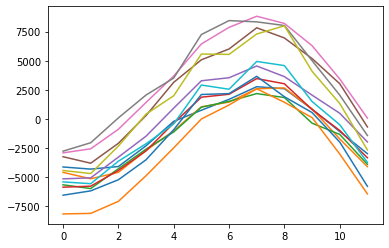

In [171]:
dfYearPublic = pd.DataFrame()
cycleLen = 12
for i in range(int(len(dfPublic.index)/cycleLen)):
    newData = pd.DataFrame({i:dfPublic['R1Public'].iloc[i*cycleLen:(i+1)*cycleLen]})
    newData.index = range(0,len(newData))
    dfYearPublic = pd.concat([dfYearPublic,newData],axis=1)

fig,ax = plt.subplots()
ax.plot(dfYearPublic)

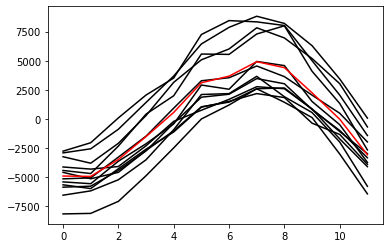

In [172]:
avg = []
for i in range(len(dfYearPublic.index)):
    avg.append(dfYearPublic.iloc[i].mean())

dfYearPublic = pd.concat([dfYearPublic,pd.DataFrame({'avg':avg})], axis=1)
#print(dfYear)

fig,ax = plt.subplots()
c = 180
for col in dfYearPublic.columns.values:
    if col == 'avg':
        ax.plot(dfYearPublic[col], c = 'r')
    else:
        ax.plot(dfYearPublic[col], c = 'k')

We can see the average of every public contract over a 12 month time frame. The value of the contracts increase over 7 months and then decrease in value for the last months of the year.

In [173]:
dfPublic['S'] = np.NaN
dfPublic['R2Public'] = np.NaN
dfPublic['Composite'] = np.NaN
dfPublic['R2ErrorPublic'] = np.NaN
S = dfYearPublic['avg'].tolist()
for i in df.index:
    dfPublic.loc[i,'S'] = S[i%cycleLen]
    dfPublic.loc[i,'R2Public'] = dfPublic.loc[i,'R1Public'] - dfPublic.loc[i,'S']
    dfPublic.loc[i,'Composite'] = dfPublic.loc[i,'regress'] + dfPublic.loc[i,'S']
    dfPublic.loc[i,'R2ErrorPublic'] = 100*dfPublic.loc[i,'R2Public'] / dfPublic.loc[i,'Public Construction']
dfPublic.style.format({
    'Public Construction': '{:,.0f}'.format,
    'regress': '{:,.0f}'.format,
    'R1Public': '{:,.0f}'.format,
    'S': '{:,.0f}'.format,
    'R2Public': '{:,.0f}'.format,
    'Composite':'{:,.0f}'.format,
    'R2ErrorPublic': '{:.2f}%'.format
})

,Month,Month-Year,Public Construction,regress,R1Public,lag12,S,R2Public,Composite,R2ErrorPublic
0,1,Jan-02,"14,243","18,380","-4,137",nan,"-4,915",778,"13,465",5.46%
1,2,Feb-02,"14,113","18,432","-4,319",nan,"-4,946",627,"13,486",4.44%
2,3,Mar-02,"14,386","18,484","-4,098",nan,"-3,494",-604,"14,990",-4.20%
3,4,Apr-02,"16,221","18,536","-2,315",nan,"-1,523",-792,"17,013",-4.88%
4,5,May-02,"18,375","18,588",-213,nan,555,-768,"19,143",-4.18%
5,6,Jun-02,"19,381","18,640",741,nan,"3,104","-2,363","21,744",-12.19%
6,7,Jul-02,"20,369","18,692","1,677",nan,"3,670","-1,993","22,362",-9.78%
7,8,Aug-02,"21,507","18,744","2,763",nan,"4,916","-2,153","23,660",-10.01%
8,9,Sep-02,"21,385","18,796","2,589",nan,"4,400","-1,811","23,196",-8.47%
9,10,Oct-02,"19,687","18,848",839,nan,"2,239","-1,400","21,087",-7.11%


The largest error for Public Contracts is -25.44%

Text(0, 0.5, 'Public Contracts')

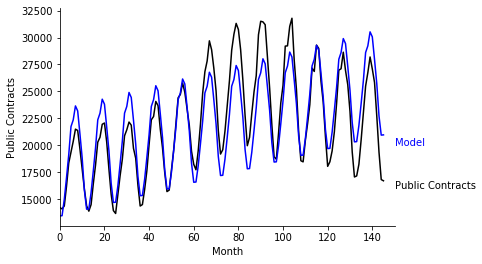

In [174]:
fig, ax = plt.subplots()
ax.plot(dfPublic['Public Construction'],c='k')
ax.plot(dfPublic['Composite'],c='b')
ax.set_xlim([0,150])
ax.text(150,16000,'Public Contracts', color='k')
ax.text(150,20000,'Model', color='b')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Month')
ax.set_ylabel('Public Contracts')

This is the remainder of our data. This shows the error in our model compared to the actual data. There is less error in this model than in the Private Construction Model.

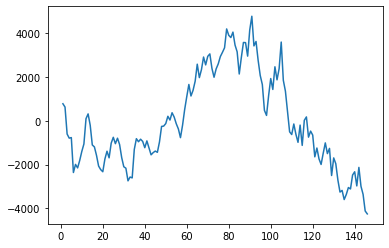

In [175]:
plt.plot(dfPublic.Month,dfPublic.R2Public)

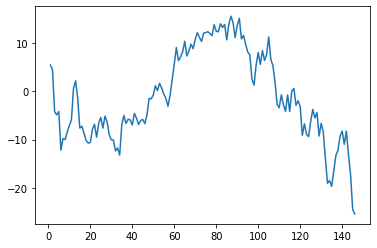

In [176]:
plt.plot(dfPublic.Month,dfPublic.R2ErrorPublic)